# APOGEE RC DR14 Distance

E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/vac/apogee-rc/cat/apogee-rc-DR14.fits was found!
This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2015.5, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide


chararray(['2M00005407+5600006', '2M00010475+7936110',
           '2M00021924+8042277', ..., '2M23591965+5648504',
           '2M23593116+7346134', '2M23594127+6456533'], dtype='<U18')

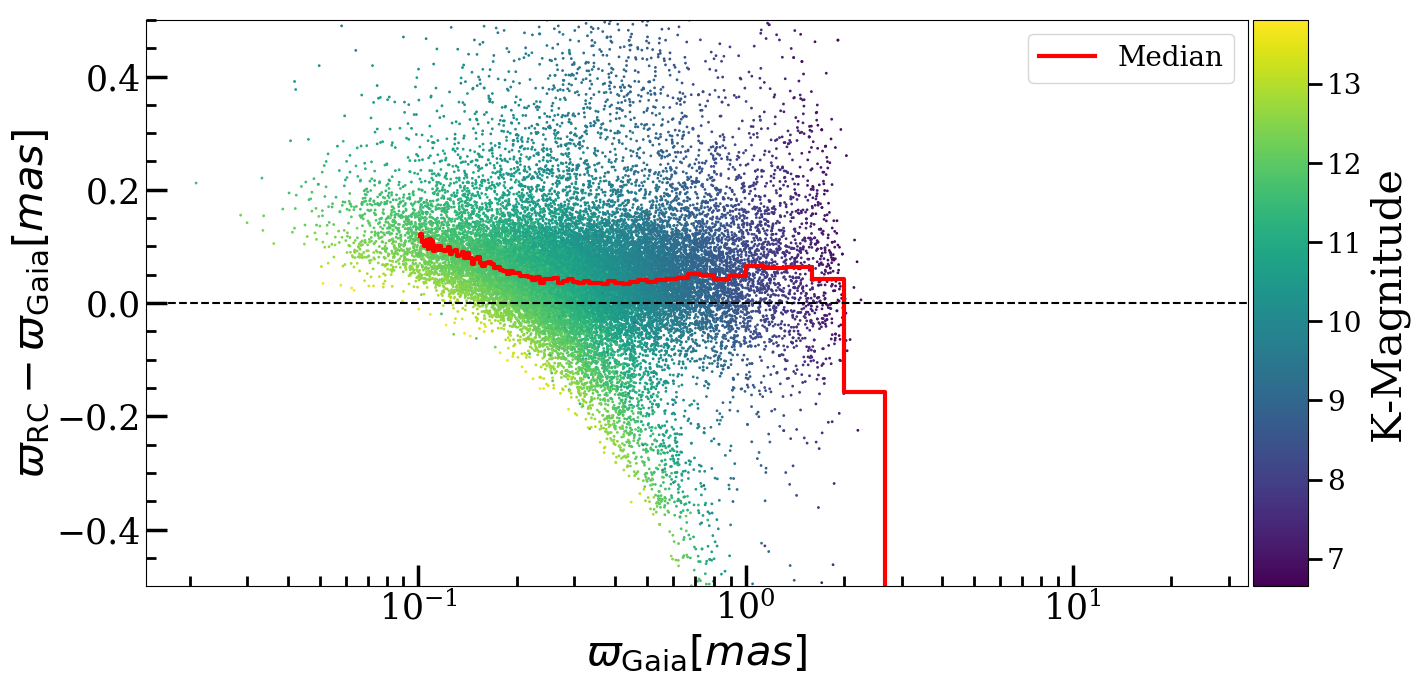

In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astroNN.apogee import allstar
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_rc
from astroNN.gaia import gaiadr2_parallax, mag_to_fakemag, fakemag_to_logsol, extinction_correction

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

file = fits.open('apogee_dr14_nn_dist_0562.fits')
allstar_file = fits.getdata(allstar(dr=14))

ra_rc, dec_rc, distance = load_apogee_rc(dr=14, metric='distance', extinction=True)
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=1.0, keepdims=True, offset=False)

corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_rc, colRA1=ra, colDec1=dec, colRA2=ra_rc, colDec2=dec_rc)

logsol = fakemag_to_logsol(mag_to_fakemag(corrected_K[idx_1], 1000 / distance[idx_2]))

good_idx = [(parallax[idx_1]>0.)]

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = 1000/distance[idx_2][good_idx] - parallax[idx_1][good_idx]

for i in range(number_bin):
    idx = [(1000/parallax[idx_1][good_idx]<spaces_dist[i+1]) & (1000/parallax[idx_1][good_idx]>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax[idx_1][good_idx], residue, c=allstar_file["K"][idx_1][good_idx], s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{RC}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label("K-Magnitude", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

allstar_file["APOGEE_ID"][idx_1][good_idx][(residue<-0.1) & (parallax[idx_1][good_idx]<1.)]


E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/vac/apogee-rc/cat/apogee-rc-DR14.fits was found!
This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2015.5, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file


No handles with labels found to put in legend.


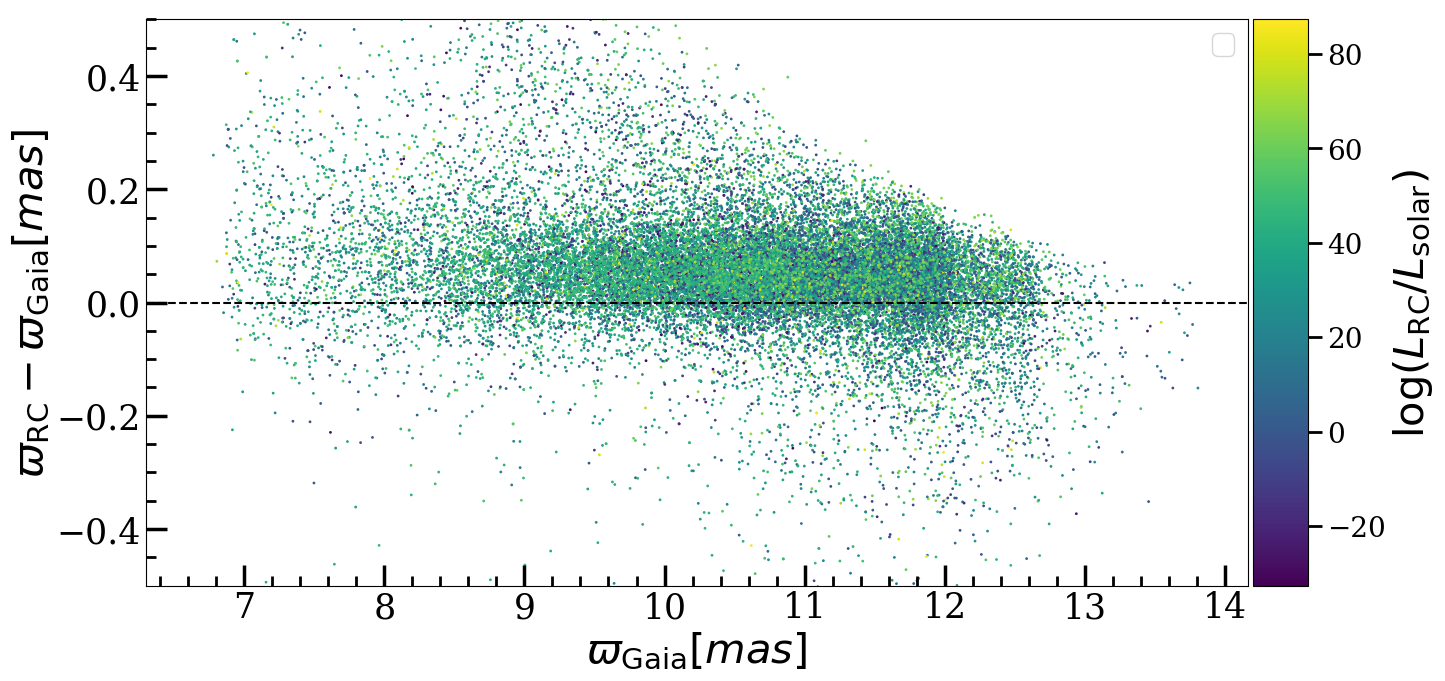

In [9]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astroNN.apogee import allstar
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_rc
from astroNN.gaia import gaiadr2_parallax, mag_to_fakemag, fakemag_to_logsol, extinction_correction

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

file = fits.open('apogee_dr14_nn_dist_0562.fits')
allstar_file = fits.getdata(allstar(dr=14))

ra_rc, dec_rc, distance = load_apogee_rc(dr=14, metric='distance', extinction=True)
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=1.0, keepdims=True, offset=False)

corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_rc, colRA1=ra, colDec1=dec, colRA2=ra_rc, colDec2=dec_rc)

logsol = fakemag_to_logsol(mag_to_fakemag(corrected_K[idx_1], 1000 / distance[idx_2]))

good_idx = [(parallax[idx_1]>0.)]

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = 1000/distance[idx_2][good_idx] - parallax[idx_1][good_idx]
f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
mappable = ax.scatter(allstar_file['K'][idx_1][good_idx], residue, c=dec[idx_1][good_idx], s=1.)
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{RC}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log (L_\mathrm{RC}/L_\mathrm{solar})$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

Using TensorFlow backend.


This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2015.5, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file
E:\sdss_mirror\dr14/apogee/vac/apogee-rc/cat/apogee-rc-DR14.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNN
Median Absolute Percentage Error (RC DR14 and NN):  4.382291425010521  %
Median Parallax Difference (RC DR14 and NN):  0.009821712791284437  mas


C:\Users\Henry\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Henry\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[16.272796557571336, 3.6821832226537285, 2.6084564609845593, 0.12772126050746113, 0.045429988540501065, 0.01734064907601207, 0.009736288785694214, 0.00668629970346557, 0.017349962659402085, 0.013362806652559844, 0.008308420300961128, 0.013720360261463227, 0.010952358174781796, 0.014097348122125264, 0.013452932944634788, 0.01549407133901054, 0.01486327891555067, 0.014399731473796584, 0.011593937121318953, 0.016234425282212278, 0.009829311836916488, 0.0155230927422364, 0.00996010832399652, 0.010612221168638025, 0.008145475845548367, 0.003970494797176288, 0.007276279274051639, 0.01225589677782124, 0.005860051255092813, 0.0019103216128527056, 0.002445658460652922, 0.00011498873687540434, -0.0019846378455556785, -0.0002659295767775405, 0.0034266926506372475, -0.008564478754326948, -0.00878071732549418, -0.01045436489692729, -0.01884684353504751, -0.007870423528865245, -0.019851563686789087, -0.01724412950920992, -0.01644429185493458, -0.03204832514902092, -0.010249930518914874, -0.029281392

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide


[nan, nan, nan, nan, nan, nan, nan, 0.06781275265799436, 0.019564565814137458, 0.0024409090261403588, 0.00037090654207982965, -0.0005022208769298597, 0.0019038799010553387, 0.0036462943482210575, 0.0035889045427345834, 0.006938863552126001, 0.004274597393634033, 0.006729692912746943, 0.013021089743246228, 0.022765800711650908, 0.03750973213417974, 0.06289570300333669, 0.10592315065557771, 0.149224879757392, 0.290854804983702, 0.7416659858601459, nan, nan, nan, nan]


C:\Users\Henry\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in less
C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in greater


[0.021719264769461497, 0.017668937713696153, 0.009525286446821157, 0.009399308569234988, 0.005366569218207107, 0.007210231311575693, 0.009047397896092352, 0.0074679851093484295, 0.008145692724383147, 0.006262468610751859, 0.009797854705905995, 0.009079101967948755, 0.012112861040009637, 0.009810149271900812, 0.01400755407927698, 0.01624524739838054, 0.016143650525986042, 0.012956388289411203, 0.01898886855825499, 0.014719746055644745, 0.016910300796496885, 0.02210840161118985, 0.02343841987694814, 0.03219943921109994, 0.03078755593763871, 0.005702236890890555, 0.03016830689318023, 0.037725708937788455, 0.014514643444237169, 0.024487986619821156]


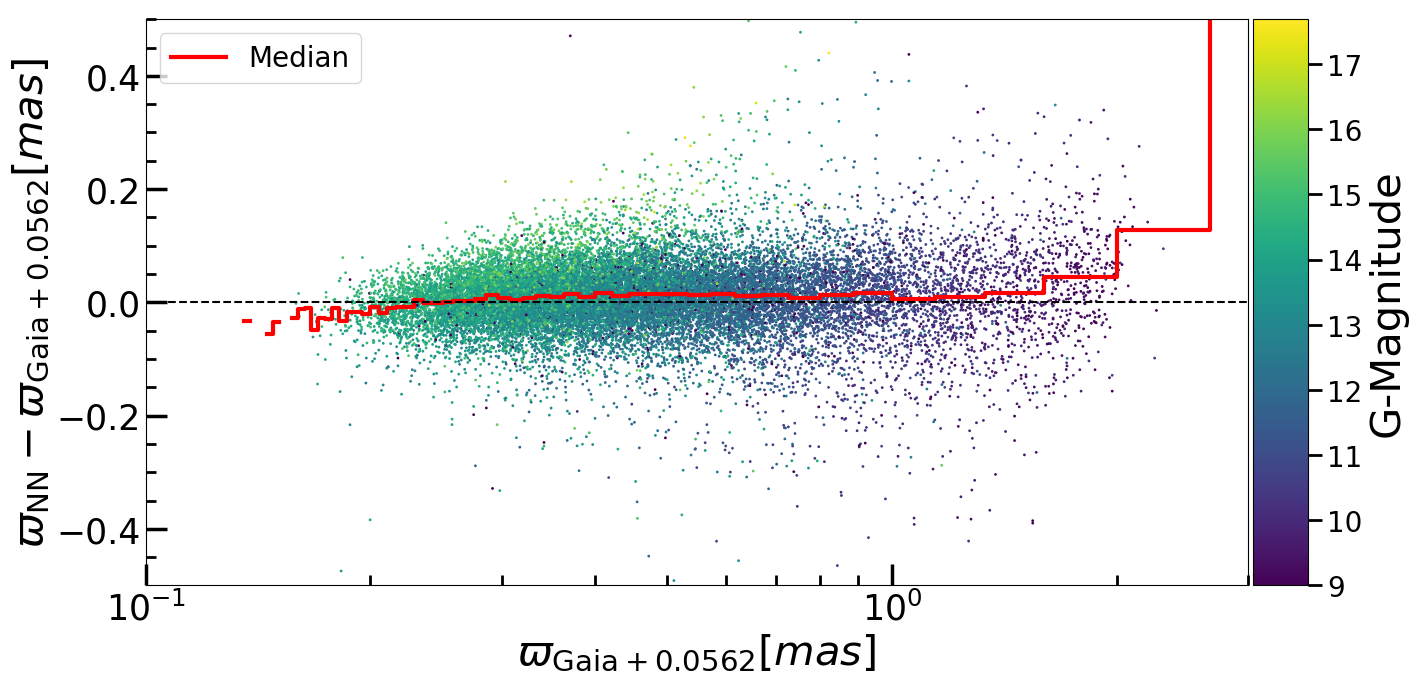

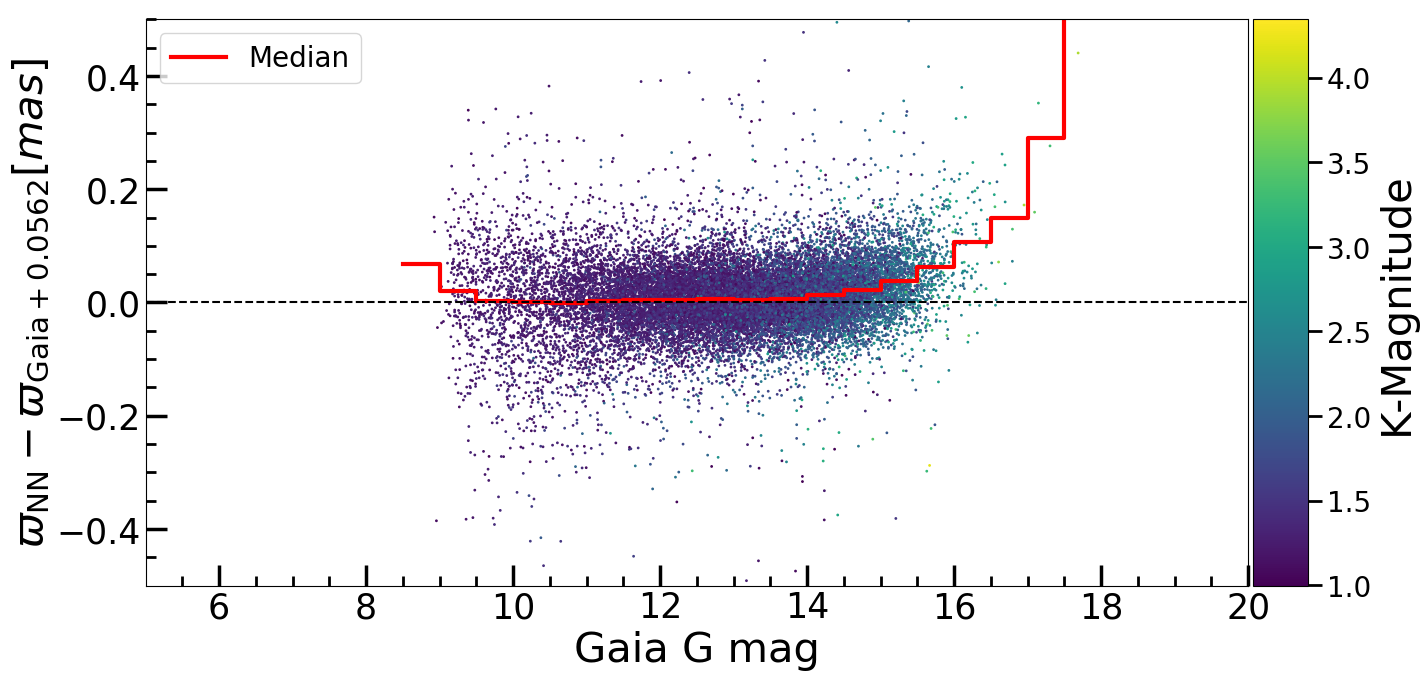

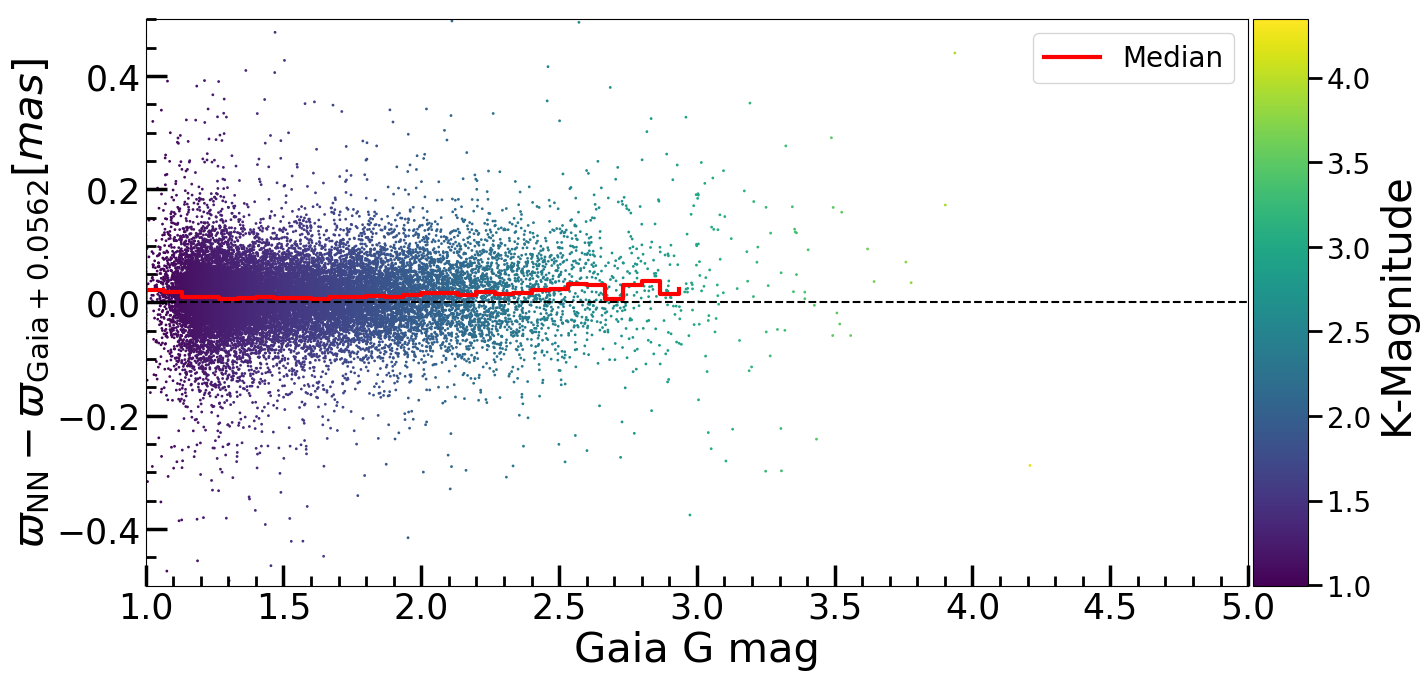

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits

from astroNN.models import load_folder
from astroNN.gaia import fakemag_to_pc
from astroNN.apogee import allstar
from astroNN.gaia import extinction_correction, gaiadr2_parallax
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_rc
from astroNN.nn.numpy import median_absolute_percentage_error

file = fits.getdata('apogee_dr14_nn_dist_0562.fits')
f_ted = fits.getdata('allStar_l31c2_GaiaDR2_crossmatch_withpms.fits')
ra, dec, parallax_gaia, parallax_error = gaiadr2_parallax(cuts=.2, keepdims=True, offset=0.0562)

ra_rc, dec_rc, distance = load_apogee_rc(dr=14, metric='distance', extinction=True)
allstar_file = fits.getdata(allstar(dr=14))

ra, dec = allstar_file['RA'], allstar_file['DEC']
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_rc, colRA1=ra, colDec1=dec, colRA2=ra_rc, colDec2=dec_rc)
idx_3, idx_4, sep = xmatch(f_ted["ra_epoch2000"], ra[idx_1], colRA1=f_ted["ra_epoch2000"], colDec1=f_ted["dec_epoch2000"], colRA2=ra[idx_1], colDec2=dec[idx_1])
rc_g_mag = np.ones(len(idx_2)) * -9999.
rc_g_mag[idx_4] = f_ted["phot_g_mean_mag"][idx_3]

rc_color = np.ones(len(idx_2))
rc_color[idx_4] = f_ted["bp_rp"][idx_3]

distance = distance[idx_2]
corrected_K = corrected_K[idx_1]

net = load_folder("astroNN_Ks_fakemag_adversial")
pred, pred_err = file["pc"][idx_1], file["pc_error"][idx_1]

good_idx = [(pred / pred_err > 0) & (parallax_gaia[idx_1] != -9999.)]
print("Median Absolute Percentage Error (RC DR14 and NN): ", 
      median_absolute_percentage_error(pred[good_idx], distance[good_idx]), " %")

parallax = 1000/pred
residue = parallax_gaia[idx_1][good_idx] - parallax[good_idx]

print("Median Parallax Difference (RC DR14 and NN): ", 
      np.median(residue), " mas")

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

for i in range(number_bin):
    idx = [(1000/parallax_gaia[idx_1][good_idx]<spaces_dist[i+1]) & (1000/parallax_gaia[idx_1][good_idx]>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

print(median_diff)

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax_gaia[idx_1][good_idx], residue, c=np.clip(rc_g_mag[good_idx], 9, 18), s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{NN}} - \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(0.1, 3)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label("G-Magnitude", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

number_bin = 30
low_mag = 5
high_mag = 20
median_diff = []
median_uncer = []
spaces_mag = np.linspace(low_mag, high_mag, number_bin+1)

for i in range(number_bin):
    idx = [(rc_g_mag[good_idx]<spaces_mag[i+1]) & (rc_g_mag[good_idx]>spaces_mag[i])]
    median_diff.append(np.median(residue[idx]))

print(median_diff)

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.plot(spaces_mag[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(rc_g_mag[good_idx], residue, c=np.clip(rc_color[good_idx], np.percentile(rc_color[good_idx], 10), np.percentile(rc_color[good_idx], 90)), s=1.)
ax.axhline(0., ls='--', c='k')
ax.set_xlabel('Gaia G mag', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{NN}} - \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(5, 20)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label("K-Magnitude", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

number_bin = 30
low_mag = 1
high_mag = 3
median_diff = []
median_uncer = []
spaces_mag = np.linspace(low_mag, high_mag, number_bin+1)

for i in range(number_bin):
    idx = [(rc_color[good_idx]<spaces_mag[i+1]) & (rc_color[good_idx]>spaces_mag[i])]
    median_diff.append(np.median(residue[idx]))

print(median_diff)

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.plot(spaces_mag[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(rc_color[good_idx], residue, c=np.clip(rc_color[good_idx], np.percentile(rc_color[good_idx], 10), np.percentile(rc_color[good_idx], 90)), s=1.)
ax.axhline(0., ls='--', c='k')
ax.set_xlabel('Gaia G mag', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{NN}} - \varpi_{\mathrm{Gaia+0.0562}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(1, 5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label("K-Magnitude", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

In [ ]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits

from astroNN.models import load_folder
from astroNN.gaia import fakemag_to_pc
from astroNN.apogee import allstar
from astroNN.gaia import extinction_correction
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_rc
from astroNN.nn.numpy import median_absolute_percentage_error

file = fits.getdata('apogee_dr14_nn_dist_0562.fits')

ra_rc, dec_rc, distance = load_apogee_rc(dr=14, metric='distance', extinction=True)
allstar_file = fits.getdata(allstar(dr=14))

ra, dec = allstar_file['RA'], allstar_file['DEC']
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_rc, colRA1=ra, colDec1=dec, colRA2=ra_rc, colDec2=dec_rc)

distance = distance[idx_2]
corrected_K = corrected_K[idx_1]

net = load_folder("astroNN_Ks_fakemag_adversial")
pred, pred_err = file["pc"][idx_1], file["pc_error"][idx_1]

good_idx = [pred / pred_err > 0]
print("Median Absolute Percentage Error (RC DR14 and NN): ", 
      median_absolute_percentage_error(pred, distance[good_idx]), " %")

parallax = 1000/pred
residue = 1000/distance[good_idx] - parallax[good_idx]

print("Median Parallax Difference (RC DR14 and NN): ", 
      np.median(residue), " mas")

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
mappable = ax.scatter(parallax[good_idx], residue, c=allstar_file["K"][idx_1][good_idx], s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{NN}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{RC}} - \varpi_{\mathrm{NN}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(0.01, 30)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label("K-Magnitude", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

# APOGEE BPG DR14 Distance

E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/vac/apogee-distances/apogee_distances-DR14.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
This is Gaia DR2 - APOGEE DR14 matched parallax, RA DEC in J2000, parallax in mas
Moreover, indices correspond to APOGEE allstar DR14 file


C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide


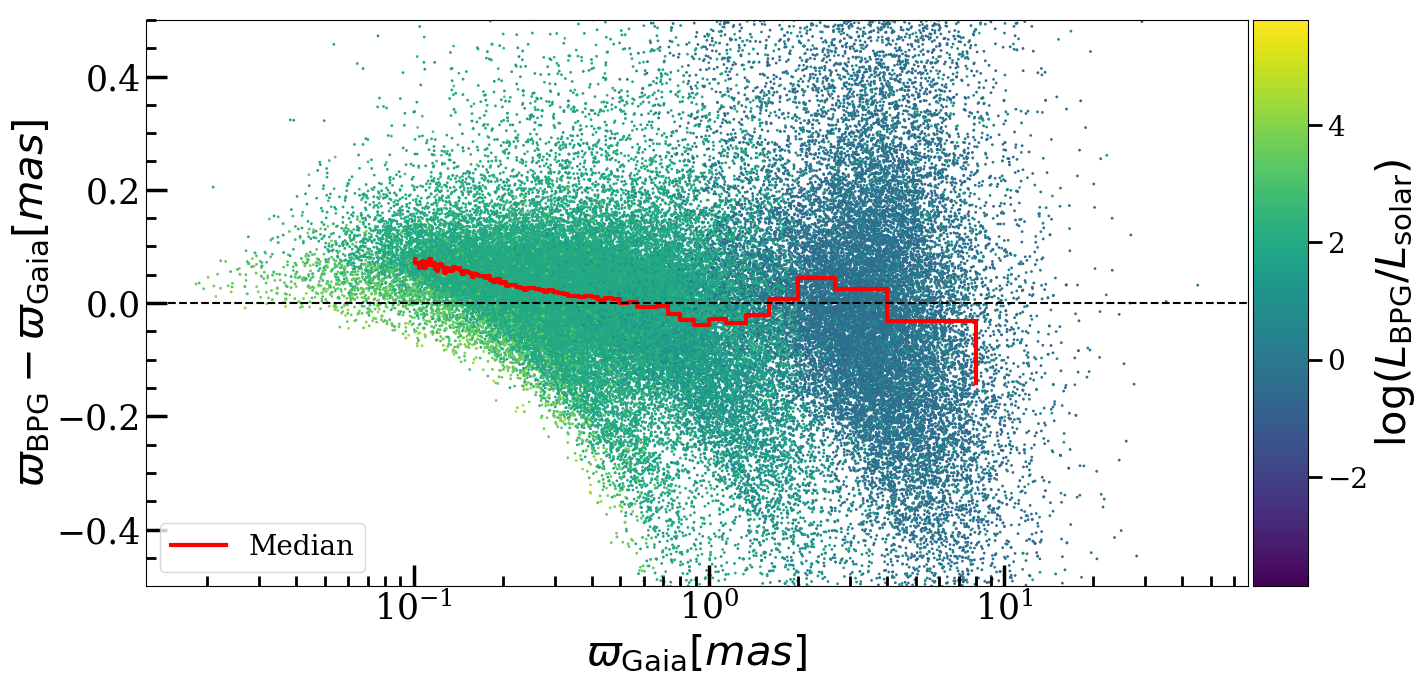

In [5]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astroNN.apogee import allstar
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_distances
from astroNN.gaia import gaiadr2_parallax, mag_to_fakemag, fakemag_to_logsol, extinction_correction

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

file = fits.open('apogee_dr14_nn_dist_0562.fits')
allstar_file = fits.getdata(allstar(dr=14))

ra_bpg, dec_bpg, distance, distance_err = load_apogee_distances(dr=14, metric='distance', cuts=0.2, keepdims=False)
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=1.0, keepdims=True, offset=False)
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_bpg, colRA1=ra, colDec1=dec, colRA2=ra_bpg, colDec2=dec_bpg)

logsol = fakemag_to_logsol(mag_to_fakemag(corrected_K[idx_1], 1000 / distance[idx_2]))

good_idx = [(parallax[idx_1]>0.) & (logsol != -9999.)]

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = 1000/distance[idx_2][good_idx] - parallax[idx_1][good_idx]

for i in range(number_bin):
    idx = [(1000/parallax[idx_1][good_idx]<spaces_dist[i+1]) & (1000/parallax[idx_1][good_idx]>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax[idx_1][good_idx], residue, c=logsol[good_idx], s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{BPG}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log (L_\mathrm{BPG}/L_\mathrm{solar})$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astroNN.apogee import allstar
from astroNN.datasets.xmatch import xmatch
from astroNN.datasets import load_apogee_distances
from astroNN.gaia import gaiadr2_parallax, mag_to_fakemag, fakemag_to_logsol, extinction_correction

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

file = fits.open('apogee_dr14_nn_dist_raw.fits')
allstar_file = fits.getdata(allstar(dr=14))

ra_bpg, dec_bpg, distance, distance_err = load_apogee_distances(dr=14, metric='distance', cuts=0.2, keepdims=False)
ra, dec, parallax, parallax_error = gaiadr2_parallax(cuts=1.0, keepdims=True, offset=False)
corrected_K = extinction_correction(allstar_file['K'], allstar_file['AK_TARG'])
idx_1, idx_2, sep = xmatch(ra, ra_bpg, colRA1=ra, colDec1=dec, colRA2=ra_bpg, colDec2=dec_bpg)

logsol = fakemag_to_logsol(mag_to_fakemag(corrected_K[idx_1], 1000 / distance[idx_2]))

good_idx = [(parallax[idx_1]>0.) & (logsol != -9999.)]

number_bin = 80
low_dist = 0
high_dist = 10000
median_diff = []
median_uncer = []
spaces_dist = np.linspace(low_dist, high_dist, number_bin+1)

residue = 1000/distance[idx_2][good_idx] - parallax[idx_1][good_idx]

for i in range(number_bin):
    idx = [(1000/parallax[idx_1][good_idx]<spaces_dist[i+1]) & (1000/parallax[idx_1][good_idx]>spaces_dist[i])]
    median_diff.append(np.median(residue[idx]))

f, ax = plt.subplots(1, figsize=(15,7.5), dpi=100)
ax.semilogx(1000 / spaces_dist[:-1], np.array(median_diff), ls='steps-post', linewidth=3., c='r', label='Median')
mappable = ax.scatter(parallax[idx_1][good_idx], residue, c=logsol[good_idx], s=1.)
ax.set_xscale('log')
ax.axhline(0., ls='--', c='k')
ax.set_xlabel(r'$ \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylabel(r'$\varpi_{\mathrm{BPG}} - \varpi_{\mathrm{Gaia}} [mas]$', fontsize=30)
ax.set_ylim(-0.5, 0.5)
ax.legend(loc='best', fontsize=20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mappable, cax=cax)
cbar.ax.tick_params(labelsize=25 * 0.8, width=20 / 10, length=20 / 2)
cbar.set_label(r"$\log (L_\mathrm{BPG}/L_\mathrm{solar})$", size=30)
ax.minorticks_on()
ax.tick_params(labelsize=25, width=2.5, length=15, which='major')
ax.tick_params(width=2, length=7, which='minor')
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

Using TensorFlow backend.


E:\sdss_mirror\dr14/apogee/vac/apogee-distances/apogee_distances-DR14.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
E:\sdss_mirror\dr14/apogee/spectro/redux/r8/stars/l31c/l31c.2/allStar-l31c.2.fits was found!
Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNN
Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 324.26s elapsed
Median Absolute Percentage Error (BPG distance DR14 and NN) 8.756936  %
Median Error (BPG distance DR14 and NN):  -7.251831  parsec
